## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Loading the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/Capstone Project Data/Hotel Bookings.csv')

# **Understanding the data**

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.size

3820480

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

## **Cleaning the Data**

> by dropping values which didnt seem relevant for our study.

*  arrival_date_week_number,company and agent

In [ ]:
df.drop(['arrival_date_week_number','company','agent'], axis=1, inplace=True)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,30,2,5,2,0.0,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,31,2,5,3,0.0,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,31,2,5,2,0.0,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,31,2,5,2,0.0,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Cancellation Concepts based on following details


> Getting the total number of guests in one column.



In [ ]:
df['kids']=df['babies'] + df['children']

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

# To further clean the data if the numerical value in a column is null and if the count of the null is nominal we can upload it to the medina value.
Here the null ount of children is just 4 out of 1lakh plus records. hence the method

In [ ]:
df['children'].median()

0.0

In [ ]:
df['children'].fillna(df['children'].median(), inplace=True)

In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

Further clean up of data. if a nominal count of string data is null then fill it by using the mode.Here the Null values of country is less than .5% so we can add the mode to null values

In [ ]:
df['country'].mode()

0    PRT
dtype: object

In [ ]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**DATA IS NOW CLEAN!!!!!**

Exploratory data analysis
Now we will start the analysis of our data
Firstly we will study the values which will affect th bookings done on the hotel.

# **Bookings based on the hotel type**

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['reservation_status_date'].count()

119390

In [ ]:
hotel_date=df.groupby('hotel')['reservation_status_date'].value_counts()
hotel_date

hotel         reservation_status_date
City Hotel    2015-10-21                 1416
              2015-07-06                  763
              2015-01-01                  760
              2016-11-25                  746
              2016-01-18                  553
                                         ... 
Resort Hotel  2015-05-15                    1
              2015-05-30                    1
              2015-06-14                    1
              2015-06-20                    1
              2017-09-12                    1
Name: reservation_status_date, Length: 1777, dtype: int64

In [ ]:
# x.count()

# **Histogram to show the distribution of data throughout the values**

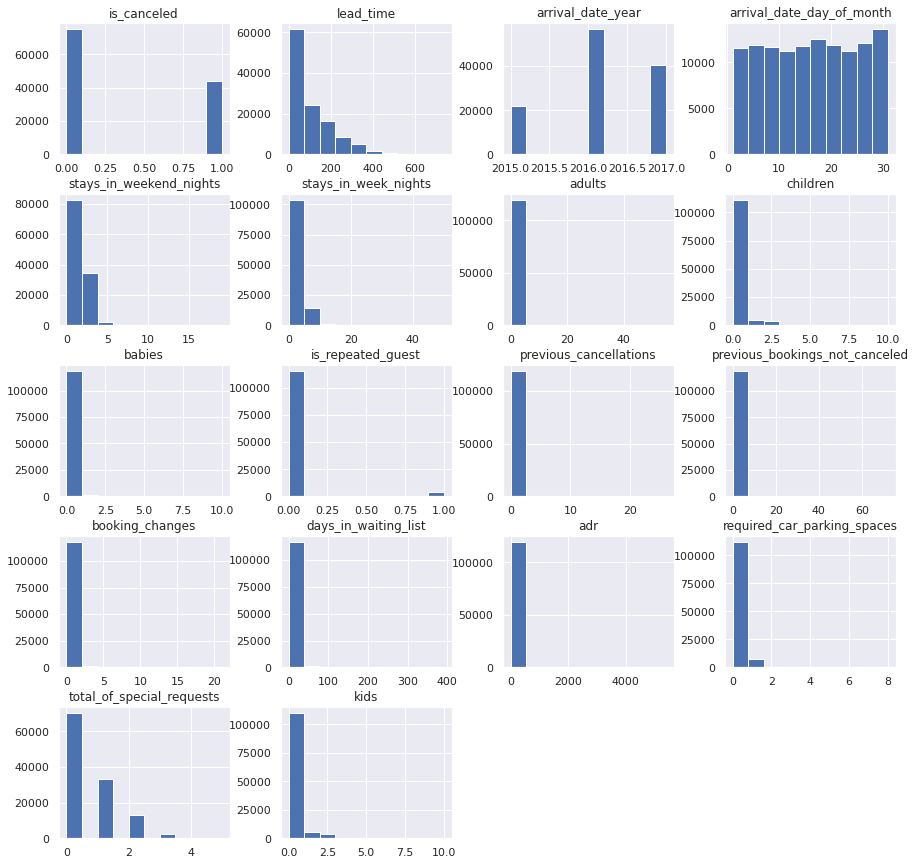

In [ ]:
df.hist(figsize=(15,15))
plt.show()

## **Reservations in different Hotel Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


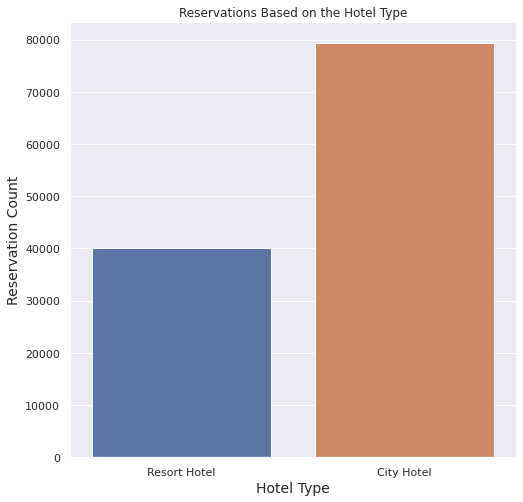

In [ ]:
# This graph shows the reservations made in both type of hotels- 'Resort Hotel','City Hotel'.
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot('hotel', data = df)
graph.set(title='Reservations Based on the Hotel Type')
graph.set_xlabel('Hotel Type', fontsize = 14)
graph.set_ylabel('Reservation Count', fontsize = 14)
plt.show()

Text(0, 0.5, 'Reservation Count')

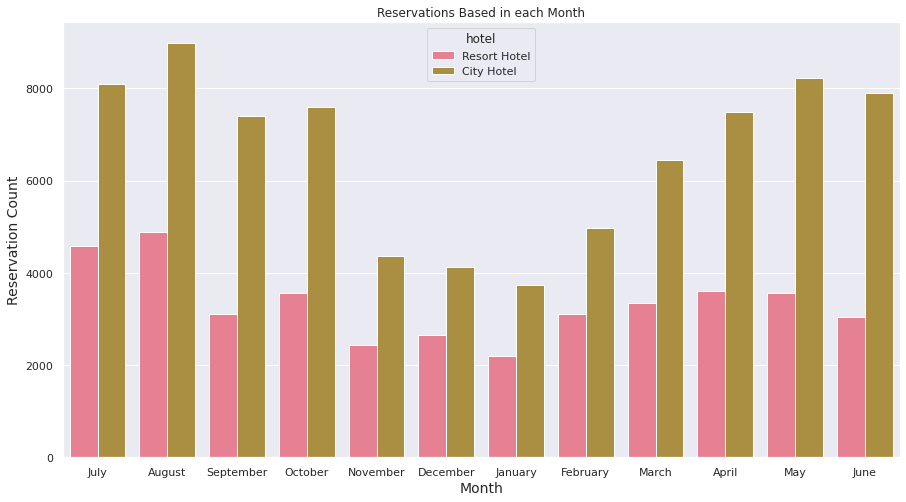

In [ ]:
# This graph shows the reservations made in each month for different hotel types.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("husl")
graph = sns.countplot(x = 'arrival_date_month',hue='hotel', data=df)
graph.set(title='Reservations Based in each Month')
graph.set_xlabel('Month',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)

## **Cancellations in different Hotel Type**

Text(0, 0.5, 'Cancellation')

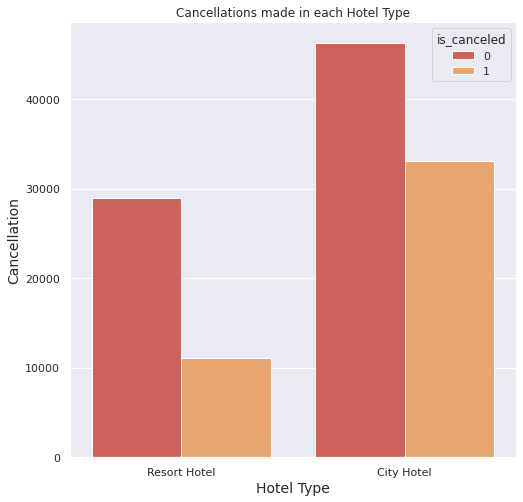

In [ ]:
# This graph shows cancellations made in different hotel types.
graph = sns.countplot(x = df['hotel'],hue=df['is_canceled'])
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Spectral")
graph.set(title='Cancellations made in each Hotel Type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

In [ ]:
df[['adults','is_canceled']].value_counts()

adults  is_canceled
2       0              54422
        1              35258
1       0              16353
        1               6674
3       0               4051
        1               2151
0       0                294
        1                109
4       0                 46
        1                 16
26      1                  5
5       1                  2
20      1                  2
27      1                  2
6       1                  1
10      1                  1
40      1                  1
50      1                  1
55      1                  1
dtype: int64

Text(0, 0.5, 'Cancellation')

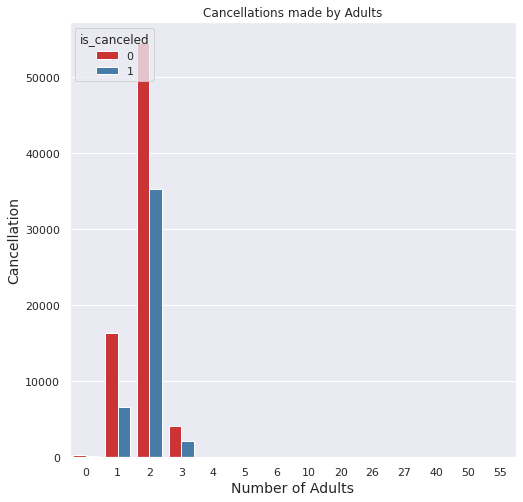

In [ ]:
# This graph shows how many adults have cancelled different hotel types
graph = sns.countplot(x=df['adults'], hue=df['is_canceled'])
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("bright")
graph.set(title='Cancellations made by Adults')
graph.set_xlabel('Number of Adults',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

In [ ]:
df['kids_count'] = df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')
df['kids_count']

0         no_kids
1         no_kids
2         no_kids
3         no_kids
4         no_kids
           ...   
119385    no_kids
119386    no_kids
119387    no_kids
119388    no_kids
119389    no_kids
Name: kids_count, Length: 119390, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancellation')

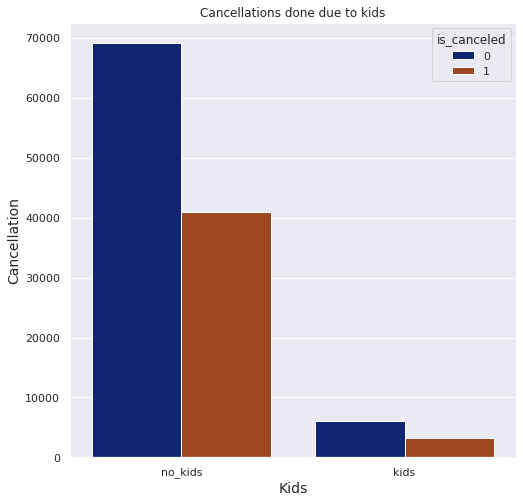

In [ ]:
# This graph shows how many cancellations were done due to kids/no kids
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("dark")
graph = sns.countplot(df['kids_count'],hue=df['is_canceled'])
graph.set(title='Cancellations done due to kids')
graph.set_xlabel('Kids',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancellation')

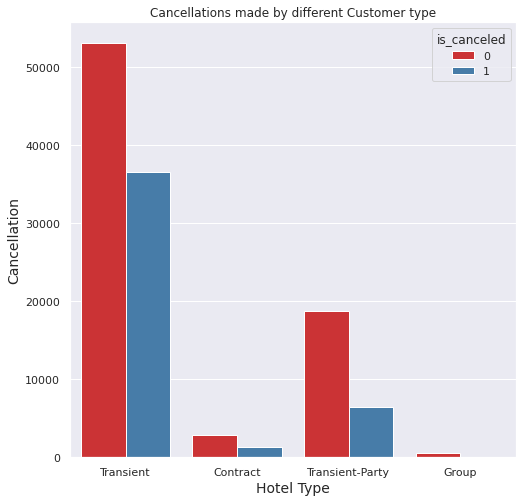

In [ ]:
# This graph shows the cancellation made by differnt customer type.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
graph = sns.countplot(df['customer_type'],hue=df['is_canceled'])
graph.set(title='Cancellations made by different Customer type')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

Text(0, 0.5, 'Cancellation')

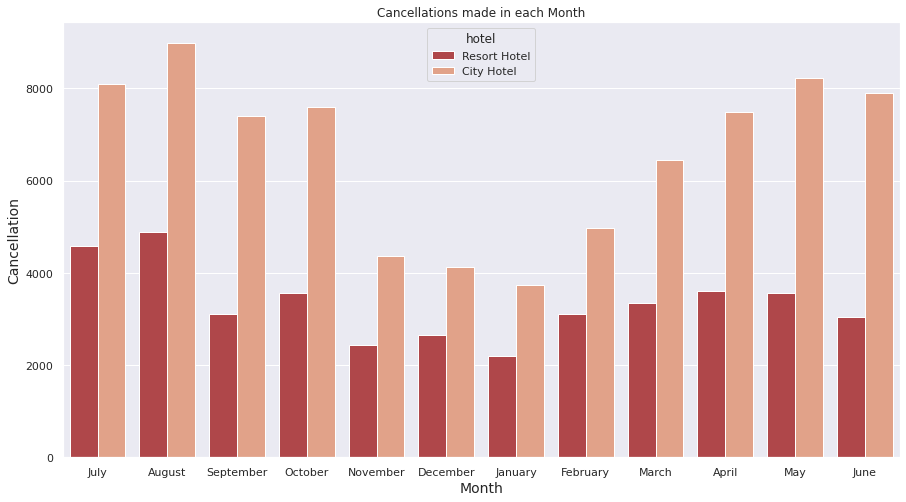

In [ ]:
# This graph shows cancellations made in each month
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("RdGy")
graph = sns.countplot(x = 'arrival_date_month',hue='hotel', data=df)
graph.set(title='Cancellations made in each Month')
graph.set_xlabel('Month',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

Text(0, 0.5, 'Cancellation')

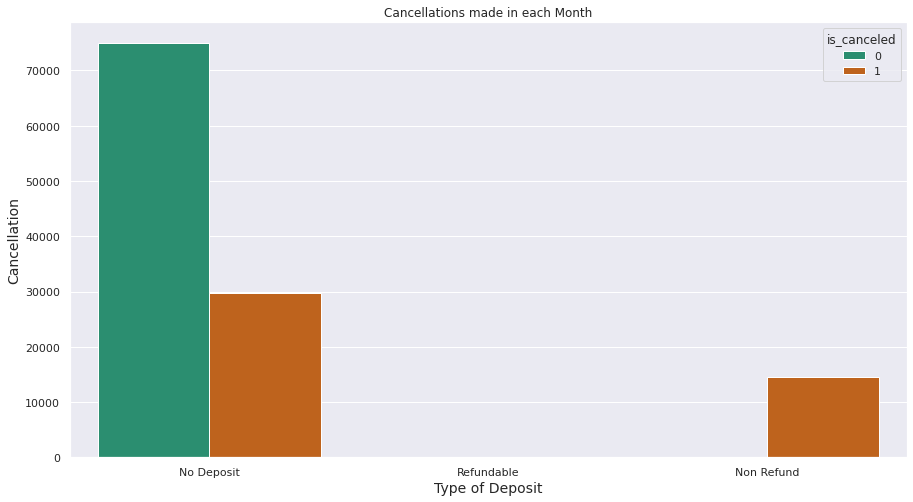

In [ ]:
# This graph shows cancellations made due to deposits.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
graph = sns.countplot(x = 'deposit_type',hue='is_canceled', data=df)
graph.set(title='Cancellations made in each Month')
graph.set_xlabel('Type of Deposit',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancellation')

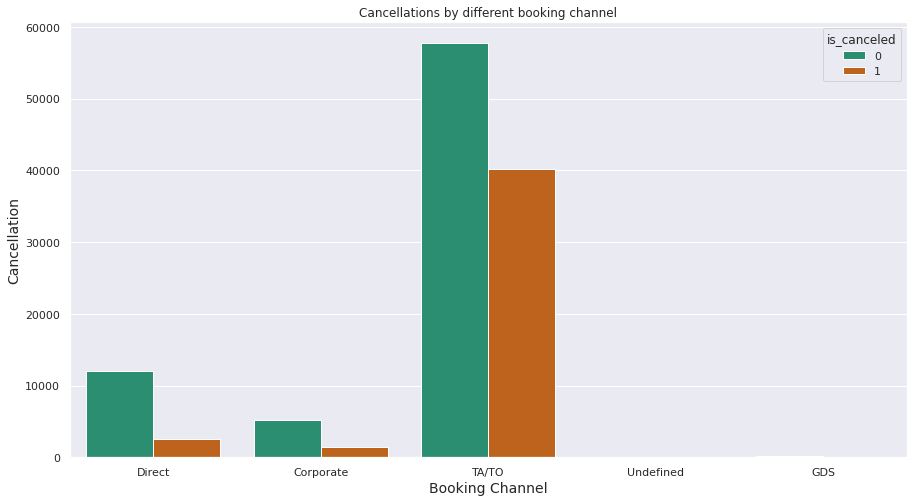

In [ ]:
# This graph shows cancellations made due to lead time.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
graph = sns.countplot(df["distribution_channel"], hue=df["is_canceled"], data=df)
graph.set(title='Cancellations by different booking channel')
graph.set_xlabel('Booking Channel',fontsize = 14)
graph.set_ylabel('Cancellation',fontsize = 14)

##**Analysis based on Hotel**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'kids_count',
       'kids_hotel'],
      dtype='object')

In [ ]:
hotel_month = df.groupby('hotel')['arrival_date_month']
hotel_month = hotel_month.value_counts()

hotel         arrival_date_month
City Hotel    August                8983
              May                   8232
              July                  8088
              June                  7894
              October               7605
              April                 7480
              September             7400
              March                 6458
              February              4965
              November              4357
              December              4132
              January               3736
Resort Hotel  August                4894
              July                  4573
              April                 3609
              May                   3559
              October               3555
              March                 3336
              September             3108
              February              3103
              June                  3045
              December              2648
              November              2437
              January   

In [ ]:
# This graph shows availability of hotel in each month of year
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
graph = sns.barplot(x= hotel,y= arrival_date_month)
graph.set(title='Availability of hotels in each Month')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Month',fontsize = 14)

NameError: ignored

In [ ]:
df[['reserved_room_type']].size

119390

In [ ]:
df[['assigned_room_type']].size

119390

In [ ]:
room_changed=[]
for i in 'reserved_room_type':
  for j in 'assigned_room_type':
    if i==j:
      room_changed.append('changed')
    else:
      room_changed.append('Not changed')
print(room_changed)

['Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'changed', 'Not changed', 'changed', 'changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'Not changed', 'No

In [ ]:
room_changed.count('Not changed')

298